<a href="https://colab.research.google.com/github/Rajasri8102/Rajasri-FITA-Capstone-Project-1/blob/main/FITA_Capstone_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Capstone Project 1 (Sales Analysis Project), Dataset: Capstone_sales_data.csv
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
capstone_sales_data = {
    "order_id": [1,2,3,4,5,6,7,8,9,10,
                 11,12,13,14,15,16,17,18,19,20],
    "order_date": ["2023-01-01","2023-01-01","2023-01-02","2023-01-02","2023-01-03","2023-01-03",
                   "2023-01-04","2023-01-04","2023-01-05","2023-01-05","2023-01-06","2023-01-06",
                   "2023-01-07","2023-01-07","2023-01-08","2023-01-08","2023-01-09","2023-01-09",
                   "2023-01-10","2023-01-10"],
    "product": ["Laptop","Mobile","TV","Laptop","AC","Mobile","Refrigerator","Headphones","Washing Machine","Tablet",
                "Laptop","Microwave","TV","Mobile","AC","Smartwatch","Laptop","Refrigerator","Mobile","TV"],
    "category": ["Electronics","Electronics","Electronics","Electronics","Home Appliances","Electronics","Home Appliances","Electronics","Home Appliances","Electronics",
                 "Electronics","Home Appliances","Electronics","Electronics","Home Appliances","Electronics","Electronics","Home Appliances","Electronics","Electronics"],
    "quantity": [1,2,1,1,1,1,1,3,1,2,
                 2,1,2,1,2,3,1,1,2,1],
    "unit_price": [45000,15000,52000,48000,30000,20000,35000,2000,28000,18000,
                   47000,15000,50000,22000,32000,12000,46000,34000,25000,53000],
    "city": ["chennai","bangalore","Hyderabad","Chennai","Mumbai","Chennai","Delhi","Bangalore","Hyderabad","Mumbai",
             "Delhi","Chennai","Bangalore","hyderabad","Delhi","mumbai","Chennai","Bangalore","delhi","Mumbai"]}

df = pd.DataFrame(capstone_sales_data)
capstone_project1_file = "capstone_sales_data.csv"
with open(capstone_project1_file, 'w', newline="") as csvfile:
  csv_writer = csv.writer(csvfile)
  csv_writer.writerows(capstone_sales_data)
df.to_csv(capstone_project1_file, index=False)


In [ ]:
#📘 1. Load + Inspect Data
df = pd.read_csv("capstone_sales_data.csv")
df.info()
df.head()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    20 non-null     int64 
 1   order_date  20 non-null     object
 2   product     20 non-null     object
 3   category    20 non-null     object
 4   quantity    20 non-null     int64 
 5   unit_price  20 non-null     int64 
 6   city        20 non-null     object
dtypes: int64(3), object(4)
memory usage: 1.2+ KB


,order_id,quantity,unit_price
count,20.00000,20.000000,20.000000
mean,10.50000,1.500000,31450.000000
std,5.91608,0.688247,15226.275765
min,1.00000,1.000000,2000.000000
25%,5.75000,1.000000,19500.000000
50%,10.50000,1.000000,31000.000000
75%,15.25000,2.000000,46250.000000
max,20.00000,3.000000,53000.000000


In [ ]:
#📘 2. Data Cleaning
print("📘 2. Data Cleaning")
df["order_date"] = pd.to_datetime(df["order_date"])
print(df["order_date"])
df["city"] = df["city"].str.strip().str.title()
print(df["city"])
df["total_amount"] = df["quantity"] * df["unit_price"]
print(df["total_amount"])
df = df.drop_duplicates()
df = df.dropna()
print(df)


📘 2. Data Cleaning
0    2023-01-01
1    2023-01-01
2    2023-01-02
3    2023-01-02
4    2023-01-03
5    2023-01-03
6    2023-01-04
7    2023-01-04
8    2023-01-05
9    2023-01-05
10   2023-01-06
11   2023-01-06
12   2023-01-07
13   2023-01-07
14   2023-01-08
15   2023-01-08
16   2023-01-09
17   2023-01-09
18   2023-01-10
19   2023-01-10
Name: order_date, dtype: datetime64[ns]
0       Chennai
1     Bangalore
2     Hyderabad
3       Chennai
4        Mumbai
5       Chennai
6         Delhi
7     Bangalore
8     Hyderabad
9        Mumbai
10        Delhi
11      Chennai
12    Bangalore
13    Hyderabad
14        Delhi
15       Mumbai
16      Chennai
17    Bangalore
18        Delhi
19       Mumbai
Name: city, dtype: object
0      45000
1      30000
2      52000
3      48000
4      30000
5      20000
6      35000
7       6000
8      28000
9      36000
10     94000
11     15000
12    100000
13     22000
14     64000
15     36000
16     46000
17     34000
18     50000
19     53000
Name: total_amo

In [ ]:
#📘 3. KPI Creation
print("📘 3. KPI Creation")
#✔ Total revenue
df["total_amount"].sum()
print(f"Total Revenue: {df['total_amount'].sum()}")
#✔ Revenue by city
df.groupby("city")["total_amount"].sum().sort_values(ascending=False)
print(f"Revenue by City:\n{df.groupby('city')['total_amount'].sum().sort_values(ascending=False)}")
#✔ Revenue by product
df.groupby("product")["total_amount"].sum().sort_values(ascending=False)
print(f"Revenue by Product:\n{df.groupby('product')['total_amount'].sum().sort_values(ascending=False)}")
#✔ Best-selling product
df.groupby("product")["quantity"].sum().sort_values(ascending=False)
print(f"Best-selling Product:\n{df.groupby('product')['quantity'].sum().sort_values(ascending=False)}")
#✔ Orders per day
df["order_date"].value_counts()
print(f"Orders per Day:\n{df['order_date'].value_counts()}")


📘 3. KPI Creation
Total Revenue: 844000
Revenue by City:
city
Delhi        243000
Chennai      174000
Bangalore    170000
Mumbai       155000
Hyderabad    102000
Name: total_amount, dtype: int64
Revenue by Product:
product
Laptop             233000
TV                 205000
Mobile             122000
AC                  94000
Refrigerator        69000
Tablet              36000
Smartwatch          36000
Washing Machine     28000
Microwave           15000
Headphones           6000
Name: total_amount, dtype: int64
Best-selling Product:
product
Mobile             6
Laptop             5
TV                 4
AC                 3
Headphones         3
Smartwatch         3
Tablet             2
Refrigerator       2
Microwave          1
Washing Machine    1
Name: quantity, dtype: int64
Orders per Day:
order_date
2023-01-01    2
2023-01-02    2
2023-01-03    2
2023-01-04    2
2023-01-05    2
2023-01-06    2
2023-01-07    2
2023-01-08    2
2023-01-09    2
2023-01-10    2
Name: count, dtype: int64


📘 4. Visualizations


/tmp/ipython-input-2748710289.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="city", y="total_amount", data=df, palette="viridis")


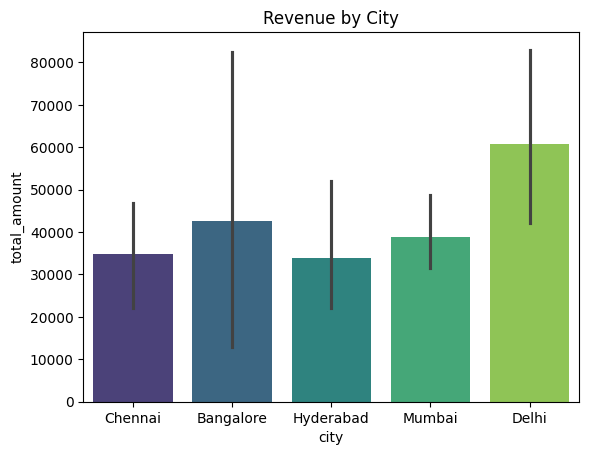

/tmp/ipython-input-2748710289.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product", y="total_amount", data=df, palette="viridis")


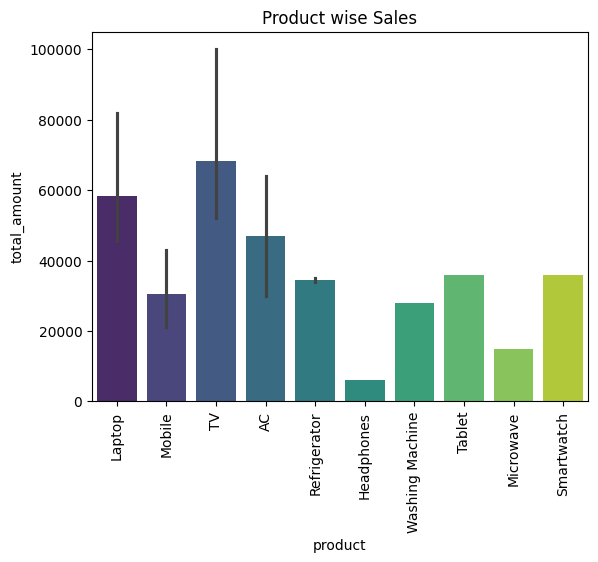

/tmp/ipython-input-2748710289.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="order_date", y="total_amount", data=df, palette="viridis")


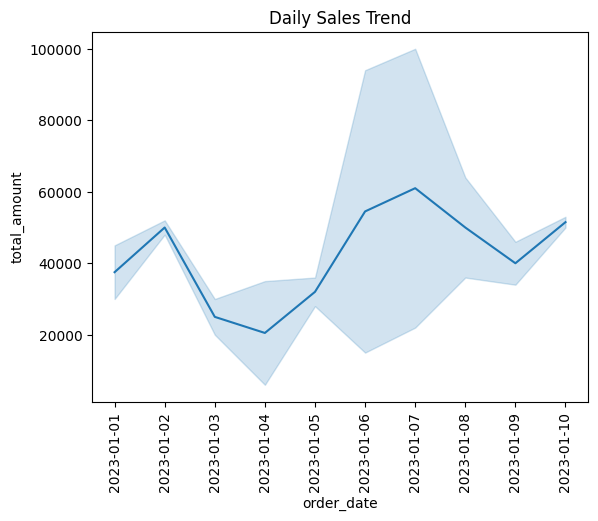

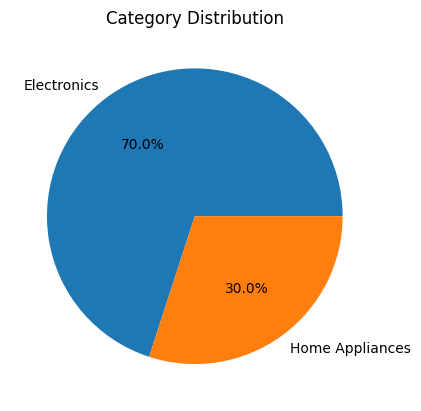

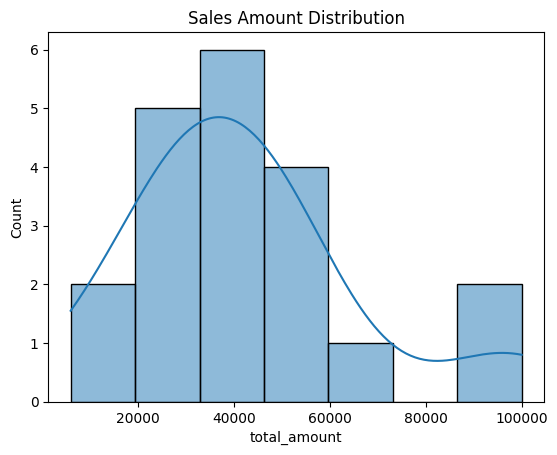

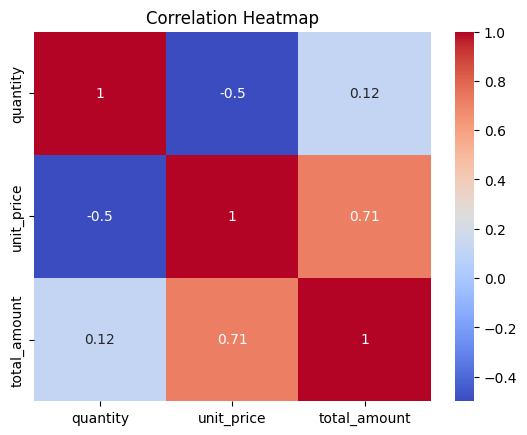

In [ ]:
#📘 4. Visualizations
print("📘 4. Visualizations")
#✔ Revenue by City — Bar Chart
sns.barplot(x="city", y="total_amount", data=df, palette="viridis")
plt.title("Revenue by City")
plt.show()
#✔ Product Sales — Bar Chart
sns.barplot(x="product", y="total_amount", data=df, palette="viridis")
plt.title("Product wise Sales")
plt.xticks(rotation=45)
plt.xticks(rotation=90)
plt.show()
#✔ Daily Sales Trend — Line Chart
sns.lineplot(x="order_date", y="total_amount", data=df, palette="viridis")
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.xticks(rotation=90)
plt.show()
#✔ Category Distribution — Pie Chart
plt.pie(df["category"].value_counts(), labels=df["category"].unique(), autopct="%1.1f%%")
plt.title("Category Distribution")
plt.show()
#✔ Sales Amount Distribution — Histogram
sns.histplot(df["total_amount"], kde=True)
plt.title("Sales Amount Distribution")
plt.show()
#✔ Correlation Heatmap
corr = df[["quantity","unit_price","total_amount"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#📘 5. Insights (Storytelling)
insights_data = {
    "Story": [
        "Delhi stands out with the highest total revenue, indicating strong market performance",
        "TV leads with the highest revenue, suggesting strong effective marketing",
        "January 2 and January 6–7 show notable peaks in total sales, indicating high customer activity",
        "Electronics dominate the chart with 70% share, indicating a strong preference",
        "Sales Distribution peak frequency lies between 30,000 and 50,000, indicating this range is the most common for sales transactions",
        "Unit Price vs Total Amount Correlation: 0.71 — This means as the unit price increases, the total amount tends to increase significantly"
    ]
}
df_insights = pd.DataFrame(insights_data)
print("📘 5. Insights (Storytelling)\n")
print(df_insights.to_string(index=False, justify="right"))


📘 5. Insights (Storytelling)

                                                                                                                                  Story
                                                  Delhi stands out with the highest total revenue, indicating strong market performance
                                                               TV leads with the highest revenue, suggesting strong effective marketing
                                         January 2 and January 6–7 show notable peaks in total sales, indicating high customer activity
                                                          Electronics dominate the chart with 70% share, indicating a strong preference
      Sales Distribution peak frequency lies between 30,000 and 50,000, indicating this range is the most common for sales transactions
Unit Price vs Total Amount Correlation: 0.71 — This means as the unit price increases, the total amount tends to increase significantly
